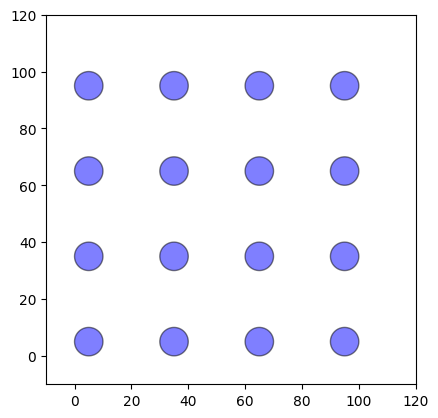

In [1]:
# Quick example of an array of circles plotted in shapely.

from shapely.geometry import Point, MultiPolygon
import matplotlib.pyplot as plt

# Define the circle creation function
def create_circle(x_center, y_center, diameter):
    radius = diameter / 2.0
    return Point(x_center, y_center).buffer(radius)  # Create a circle as a buffer around the point

# Set the diameter and spacing
diameter_mm = 10.0
spacing_mm = 20.0

# Initialize a list to hold the circles
circles_array = []

# Calculate the total distance between the centers of adjacent circles
center_distance_mm = diameter_mm + spacing_mm  # Since they are 10 mm in diameter and 20 mm apart, their centers are 30 mm apart

# Create a 4x4 array of circles
for i in range(4):
    row_circles = []
    for j in range(4):
        x_center = i * center_distance_mm + diameter_mm / 2  # Offset by radius for the first circle's center
        y_center = j * center_distance_mm + diameter_mm / 2
        circle = create_circle(x_center, y_center, diameter_mm)
        row_circles.append(circle)
    circles_array.append(row_circles)

# Now `circles_array` contains all our circle objects.
# We can visualize it using matplotlib (optional step).

# Plot the circles using matplotlib
fig, ax = plt.subplots()
for row in circles_array:
    for circle in row:
        x, y = circle.exterior.xy  # Get the x and y coordinates of the circle's exterior
        ax.fill(x, y, alpha=0.5, fc='blue', ec='black')  # Fill the circle with blue color

# Set equal aspect ratio
ax.set_aspect('equal')

# Show plot with a buffered frame around the circles
ax.set_xlim(0 - diameter_mm, 4 * center_distance_mm)
ax.set_ylim(0 - diameter_mm, 4 * center_distance_mm)
plt.show()